In [2]:
import sys
sys.path.append('../src')
from numpy import *
from Params import *
from NeutrinoFuncs import *

E_th = 1.0e-4
Names,Solar,E_nu_all,Flux_all,Flux_norm,Flux_err = GetNuFluxes(E_th,Nuc=Xe131)
n_nu = shape(Flux_all)[0]
EmaxAr = MaxNuRecoilEnergies(Ar40)
EmaxXe = MaxNuRecoilEnergies(Xe131)

for i in range(0,n_nu):
    print(Names[i],'$',NuMaxEnergy[i],'$ & $','{0:.4f}'.format(EmaxXe[i]),'$ & $','{0:.4f}'.format(EmaxAr[i]),'$')


pp $ 0.42341 $ & $ 0.0030 $ & $ 0.0099 $
pep $ 1.44 $ & $ 0.0345 $ & $ 0.1142 $
hep $ 18.765 $ & $ 5.8594 $ & $ 19.3673 $
7Be1 $ 0.3843 $ & $ 0.0025 $ & $ 0.0081 $
7Be2 $ 0.8613 $ & $ 0.0123 $ & $ 0.0408 $
8B $ 16.34 $ & $ 4.4430 $ & $ 14.6870 $
13N $ 1.193 $ & $ 0.0237 $ & $ 0.0784 $
15O $ 1.7285 $ & $ 0.0497 $ & $ 0.1645 $
17F $ 1.7365 $ & $ 0.0502 $ & $ 0.1660 $
DSNB $ 91.201 $ & $ 138.2405 $ & $ 455.6604 $
Atm $ 10000.0 $ & $ 1418586.8534 $ & $ 3385340.3469 $
GeoU $ 4.54 $ & $ 0.3431 $ & $ 1.1345 $
GeoTh $ 2.33 $ & $ 0.0904 $ & $ 0.2989 $
GeoK $ 1.3572 $ & $ 0.0307 $ & $ 0.1014 $
Reactor $ 11.418 $ & $ 2.1697 $ & $ 7.1734 $


(0.001, 1)

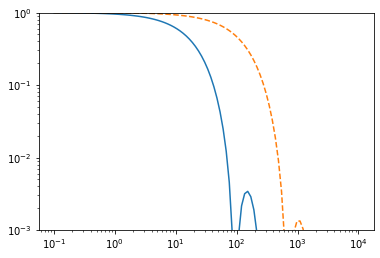

In [8]:
from LabFuncs import *
import matplotlib.pyplot as plt 
E_r = logspace(-1,4,100)
plt.loglog(E_r,FormFactorHelm(E_r,131)**2.0)
plt.loglog(E_r,FormFactorHelm(E_r,40)**2.0,'--')

plt.ylim([1e-3,1])
